In [33]:
from geopandas import GeoDataFrame
import geopandas as gpd
import pandas as pd
from plotnine import *
from shapely.geometry import box
import ipywidgets as widgets
import matplotlib.pyplot as plt
from matplotlib import font_manager

%matplotlib inline

In [2]:
highways = GeoDataFrame.from_file(r'N:\Nauka\BigData\data\highways_warsaw.shp').to_crs(epsg=2180)
streets = GeoDataFrame.from_file(r'N:\Nauka\BigData\data\streets_warsaw.shp').to_crs(epsg=2180)

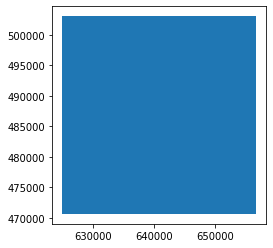

In [3]:
bbox_box = box(*highways.total_bounds)
bbox_gdf = gpd.GeoDataFrame(gpd.GeoSeries(bbox_box), columns=['geometry'], crs=2180)
bbox_gdf.plot()
bbox = bbox_gdf.buffer(-1000).total_bounds

In [4]:
bbox

array([625812.83686344, 471625.18264414, 655720.0407763 , 502042.5057796 ])

In [5]:
# color_roads = "#6B727C" #default
color_roads = "#98A1AE"
color_roads_highways = "#c8d2df"

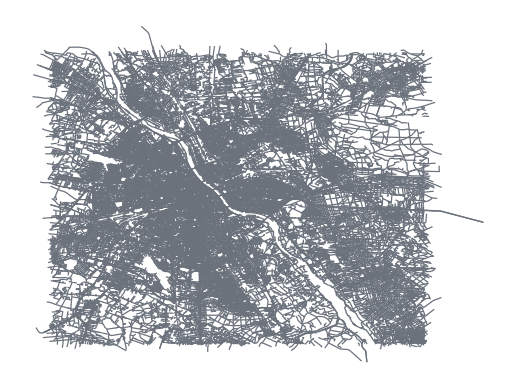

<ggplot: (-9223371874748418448)>

In [9]:
p = (ggplot() + geom_map(highways, color=color_roads) + geom_map(streets, color=color_roads) + theme_void())
p

In [11]:
p.save(filename = 'test3.png', height=36, width=36, units = 'in', dpi=500,limitsize=False)

N:\Anaconda\envs\GeoEnv\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 36 x 36 in image.
N:\Anaconda\envs\GeoEnv\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: test3.png


In [6]:
woda = GeoDataFrame.from_file(r'N:\Nauka\BigData\data\PTWP_Wody_powierzchniowe_calosc_dissolved.shp')
wojewodztwa = GeoDataFrame.from_file(r'N:\Nauka\BigData\data\Województwa.shp').to_crs(epsg=2180)

In [7]:
mazowieckie = wojewodztwa[wojewodztwa['JPT_NAZWA_'] == 'mazowieckie']

<AxesSubplot:>

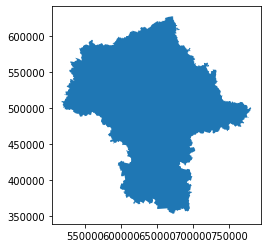

In [8]:
mazowieckie.plot()

<AxesSubplot:>

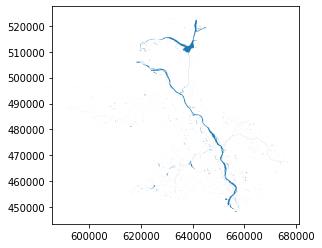

In [9]:
woda['geometry'].plot()

N:\Anaconda\envs\GeoEnv\lib\site-packages\ipykernel_launcher.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:2180
Right CRS: PROJCS["PUWG-92",GEOGCS["GCS_EUREF_89",DATUM["Not_ ...



<AxesSubplot:>

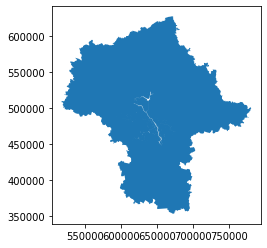

In [10]:
mazowieckie_er = gpd.overlay(mazowieckie, woda, how='difference')
mazowieckie_er.plot()

<AxesSubplot:>

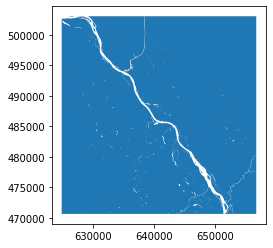

In [11]:
mazowieckie_er2 = gpd.clip(mazowieckie_er, bbox_gdf)
mazowieckie_er2.plot()

In [12]:
#fill_col = "#343C47"
#background_col = "#EBAD1B"
fill_col = "#343C47"
background_col = "#CBBD1A"

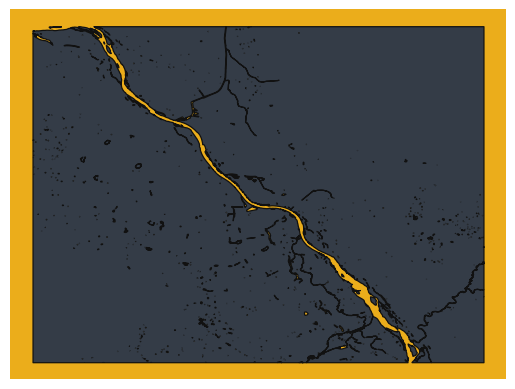

<ggplot: (-9223371874744291300)>

In [88]:
p2 = (ggplot() + geom_map(mazowieckie_er2, inherit_aes = False, stroke = 0, fill = fill_col) 
 + theme_void() + theme(panel_background=element_rect(fill=background_col)))
p2

In [89]:
p2.save(filename = 'test4.png', height=36, width=36, units = 'in', dpi=500,limitsize=False)

N:\Anaconda\envs\GeoEnv\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 36 x 36 in image.
N:\Anaconda\envs\GeoEnv\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: test4.png


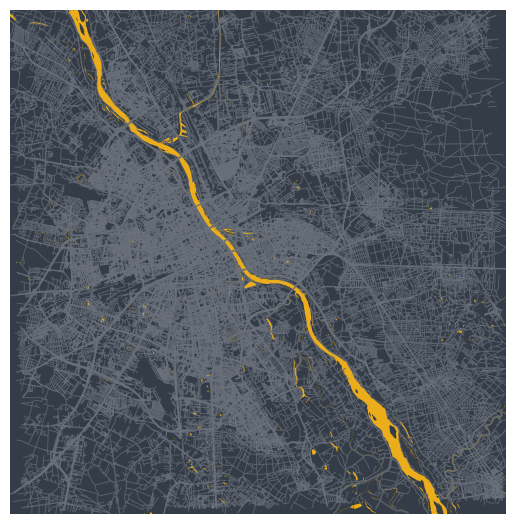

<ggplot: (-9223371874830223372)>

In [101]:
p3 = (ggplot() + geom_map(mazowieckie_er2, inherit_aes = False, stroke = 0, size = 0, fill = fill_col) +
      geom_map(highways, inherit_aes = False, color=color_roads, stroke = 0, size = .6, alpha = .65) +
      geom_map(streets, inherit_aes = False, color=color_roads, stroke = 0, size = .4, alpha = .65) +
      coord_fixed(xlim = (bbox[0], bbox[2]), ylim=(bbox[1],bbox[3]), expand=False) +
      theme_void() + theme(panel_background=element_rect(fill=background_col)))
p3

In [102]:
p3.save(filename = 'test5.png', height=50, width=50, units = 'cm', dpi=600,limitsize=False)

N:\Anaconda\envs\GeoEnv\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 50.0 x 50.0 cm image.
N:\Anaconda\envs\GeoEnv\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: test5.png


In [13]:
railways = GeoDataFrame.from_file(r'N:\Nauka\BigData\data\railways_warsaw.gpkg').to_crs(epsg=2180)

In [14]:
railways['railway'].value_counts()

rail      2074
tram      1177
subway     136
Name: railway, dtype: int64

In [15]:
rail = railways[railways['railway'] == 'rail']
tram = railways[railways['railway'] == 'tram']
subway = railways[railways['railway'] == 'subway']

rail_color = "#418B72"
tram_color = "#FF9980"
subway_color = "#B32400"

In [16]:
dzielnice = GeoDataFrame.from_file(r'N:\Nauka\BigData\data\dzielnice_Warszawy.shp').to_crs(epsg=2180)

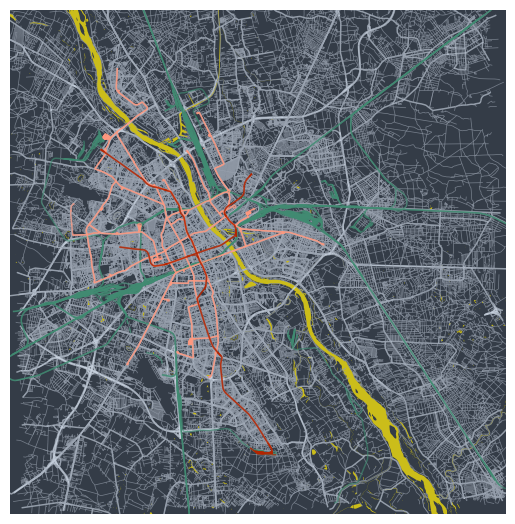

<ggplot: (-9223371846234149948)>

In [19]:
p4 = (ggplot() + geom_map(mazowieckie_er2, inherit_aes = False, stroke = 0, size = 0, fill = fill_col) +
      geom_map(highways, inherit_aes = False, color=color_roads_highways, stroke = 0, size = .6, alpha = .65) +
      geom_map(streets, inherit_aes = False, color=color_roads, stroke = 0, size = .3, alpha = .65) +
    geom_map(rail, inherit_aes = False, color=rail_color, stroke = 0, size = .6, alpha = .65) +
    geom_map(tram, inherit_aes = False, color=tram_color, stroke = 0, size = .6, alpha = .65) +
    geom_map(subway, inherit_aes = False, color=subway_color, stroke = 0, size = .6, alpha = .65) +
      coord_fixed(xlim = (bbox[0], bbox[2]), ylim=(bbox[1],bbox[3]), expand=False) +
      theme_void() + theme(panel_background=element_rect(fill=background_col)))
p4

In [ ]:
p4.save(filename = 'test7.png', height=50, width=50, units = 'cm', dpi=600,limitsize=False)

In [53]:
prop = font_manager.FontProperties(fname=r'N:\Nauka\BigData\data\FiraMono-Bold.ttf')

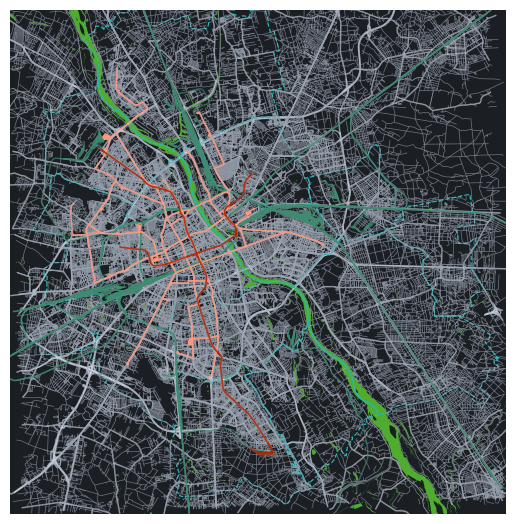

<ggplot: (-9223371846239918060)>

In [63]:
p5 = (ggplot() + geom_map(mazowieckie_er2, inherit_aes = False, stroke = 0, size = 0, fill = "#1b1e23") +
      geom_map(highways, inherit_aes = False, color=color_roads_highways, stroke = 0, size = .6, alpha = .65) +
      geom_map(dzielnice, inherit_aes = False, fill = None, stroke = 3, linetype = 'dashed', color = "#28b6b8") +
      geom_map(streets, inherit_aes = False, color=color_roads, stroke = 0, size = .3, alpha = .65) +
    geom_map(rail, inherit_aes = False, color=rail_color, stroke = 0, size = .6, alpha = .65) +
    geom_map(tram, inherit_aes = False, color=tram_color, stroke = 0, size = .6, alpha = .65) +
    geom_map(subway, inherit_aes = False, color=subway_color, stroke = 0, size = .6, alpha = .65) +
      coord_fixed(xlim = (bbox[0], bbox[2]), ylim=(bbox[1],bbox[3]), expand=False) +
      theme_void() + theme(panel_background=element_rect(fill="#50ac2f")))
p5

In [28]:
p5.save(filename = 'test7.png', height=50, width=50, units = 'cm', dpi=600,limitsize=False)

N:\Anaconda\envs\GeoEnv\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 50.0 x 50.0 cm image.
N:\Anaconda\envs\GeoEnv\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: test7.png


In [17]:
widgets.ColorPicker(
    concise=False,
    description='Pick a color',
    value='blue',
    disabled=False
)

ColorPicker(value='blue', description='Pick a color')